## Clustering Produktivitas *AI* *Developer* Berdasarkan Faktor Harian

## EDA

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [211]:
df = pd.read_csv('../dataset/Productivity.csv')

In [212]:
df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [213]:
df.duplicated().sum()

0

In [214]:
df = df.drop(columns='task_success')

Kolom task_success harus dibuang diawal untuk menemukan pola atau kelompok yang ada secara alami dalam data, tanpa terpengaruhi oleh label yang sudah diketahui. Jika kita menyertakan task_success, algoritma tidak akan menemukan pola tersembunyi, melainkan hanya akan mengelompokkan hari-hari menjadi dua kategori yang sudah jelas sejak awal yaitu hari "sukses" dan hari "gagal". Dengan memisahkan kolom ini, kita bisa secara independen mengidentifikasi faktor-faktor (seperti jam tidur, kafein, atau distraksi) yang berhubungan dengan keberhasilan, dan kemudian menggunakan task_success untuk memvalidasi klaster.

In [215]:
df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,5.99,600,1,5.8,2,1,0.71,5.4
1,4.72,568,2,6.9,5,3,1.75,4.7
2,6.30,560,1,8.9,2,0,2.27,2.2
3,8.05,600,7,6.3,9,5,1.40,5.9
4,4.53,421,6,6.9,4,0,1.26,6.3


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


#### Fitur Numerik

##### Distribusi

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,5.01560,1.947253,0.0,3.6000,5.03,6.275,12.00
coffee_intake_mg,500.0,463.19200,142.334991,6.0,369.5000,500.50,600.000,600.00
distractions,500.0,2.97600,1.678409,0.0,2.0000,3.00,4.000,8.00
sleep_hours,500.0,6.97580,1.455965,3.0,6.1000,6.95,7.900,10.00
commits,500.0,4.60800,2.704990,0.0,3.0000,5.00,6.000,13.00
bugs_reported,500.0,0.85800,1.102846,0.0,0.0000,0.00,2.000,5.00
ai_usage_hours,500.0,1.51092,1.085557,0.0,0.6975,1.26,2.070,6.36
cognitive_load,500.0,4.49820,1.868861,1.0,3.1750,4.40,5.800,10.00



 PERSEBARAN FITUR NUMERIK


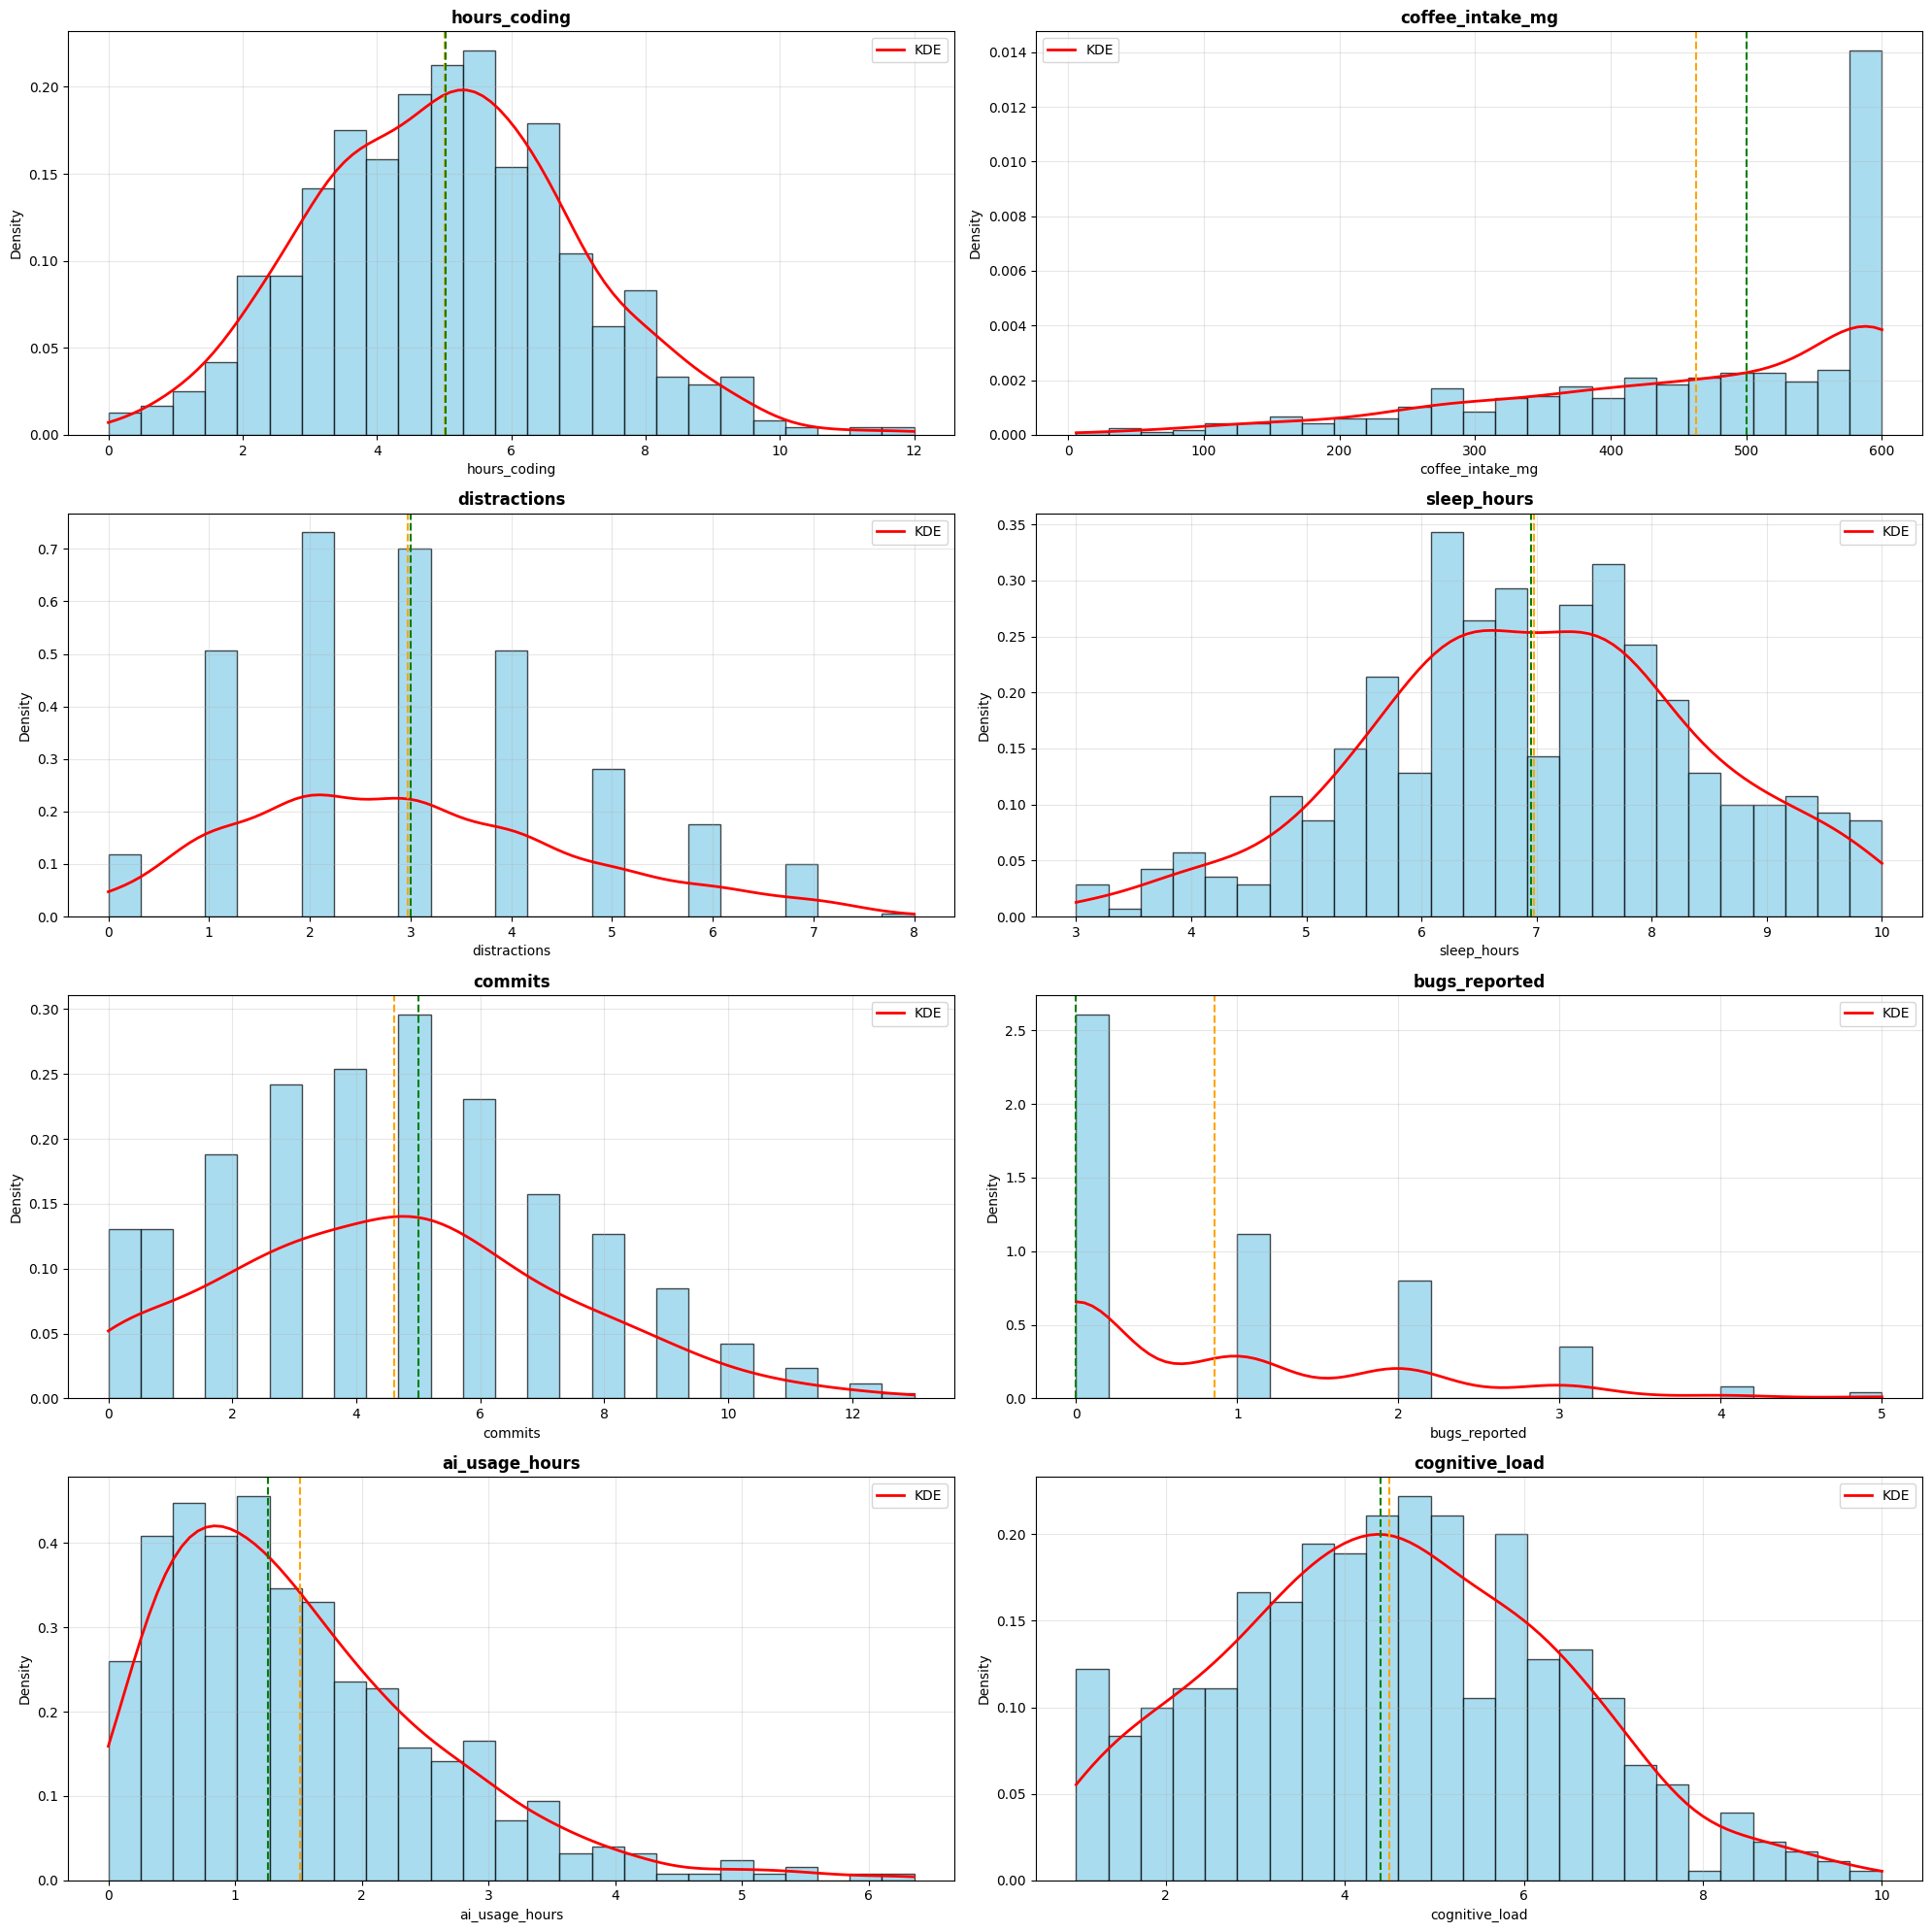

In [218]:
print("\n PERSEBARAN FITUR NUMERIK")
print("=" * 40)

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(df.columns):
    axes[i].hist(df[feature], bins=25, alpha=0.7, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    kde = stats.gaussian_kde(df[feature])
    axes[i].plot(x, kde(x), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Stats
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

plt.tight_layout()
plt.show()

##### Outlier Detection


 BOXPLOT DETEKSI OUTLIER


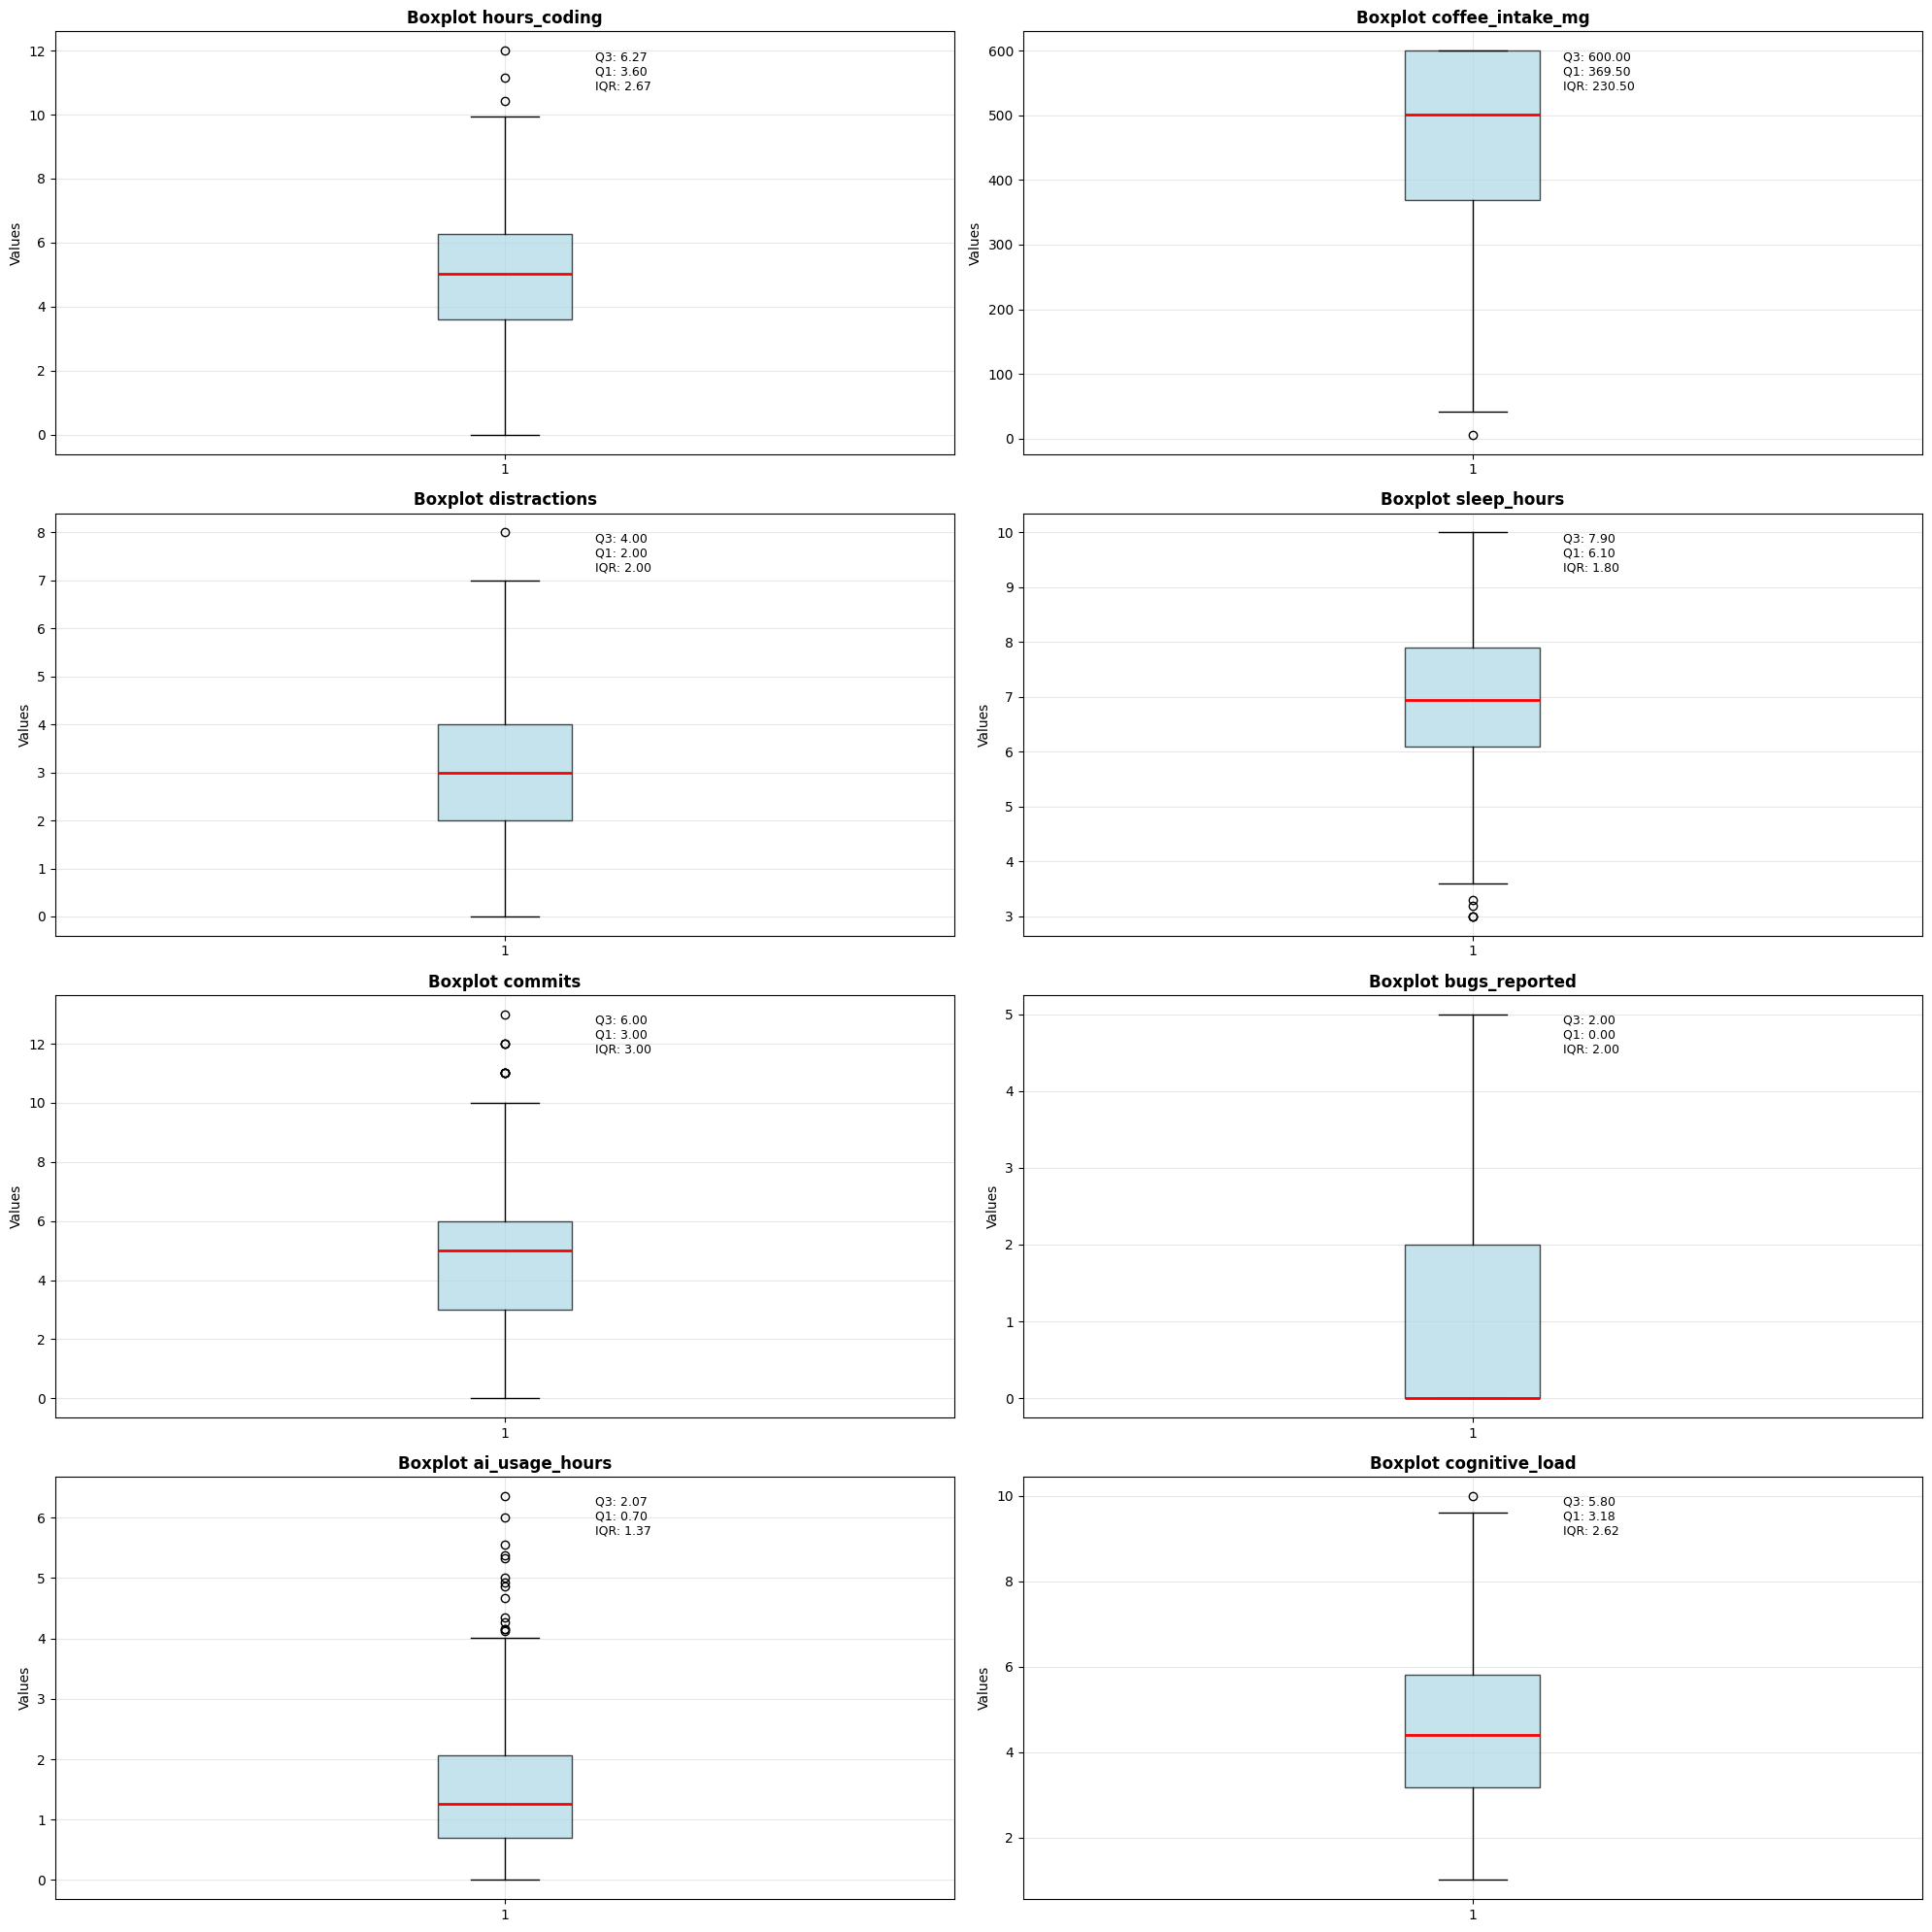

In [219]:
# Deteksi Outlier dengan boxplot
print("\n BOXPLOT DETEKSI OUTLIER")
print("=" * 40)

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(df.columns):
    # Boxplot
    box_plot = axes[i].boxplot(df[feature], patch_artist=True, 
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Values')
    axes[i].grid(True, alpha=0.3)
    
    # Tambahkan statistik pada plot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[i].text(1.1, df[feature].max(), f'Q3: {Q3:.2f}\nQ1: {Q1:.2f}\nIQR: {IQR:.2f}', 
                verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

In [220]:
# Deteksi outlier dengan IQR 
print("\n DETEKSI OUTLIER MENGGUNAKAN IQR")
print("=" * 50)


for feature in df.columns:
    print(f"\n {feature.upper()}")
    print("-" * 30)
    
    # Hitung quartile dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    
    print(f"Q1 (25th percentile): {Q1:.3f}")
    print(f"Q3 (75th percentile): {Q3:.3f}")
    print(f"IQR                 : {IQR:.3f}")
    print(f"Lower Bound         : {lower_bound:.3f}")
    print(f"Upper Bound         : {upper_bound:.3f}")
    print(f"Outlier Count       : {outlier_count}")
    print(f"Outlier Percentage  : {outlier_percentage:.2f}%")
    
    if outlier_count > 0:
        print(f"Outlier Range       : {outliers[feature].min():.3f} to {outliers[feature].max():.3f}")


 DETEKSI OUTLIER MENGGUNAKAN IQR

 HOURS_CODING
------------------------------
Q1 (25th percentile): 3.600
Q3 (75th percentile): 6.275
IQR                 : 2.675
Lower Bound         : -0.412
Upper Bound         : 10.287
Outlier Count       : 3
Outlier Percentage  : 0.60%
Outlier Range       : 10.440 to 12.000

 COFFEE_INTAKE_MG
------------------------------
Q1 (25th percentile): 369.500
Q3 (75th percentile): 600.000
IQR                 : 230.500
Lower Bound         : 23.750
Upper Bound         : 945.750
Outlier Count       : 1
Outlier Percentage  : 0.20%
Outlier Range       : 6.000 to 6.000

 DISTRACTIONS
------------------------------
Q1 (25th percentile): 2.000
Q3 (75th percentile): 4.000
IQR                 : 2.000
Lower Bound         : -1.000
Upper Bound         : 7.000
Outlier Count       : 1
Outlier Percentage  : 0.20%
Outlier Range       : 8.000 to 8.000

 SLEEP_HOURS
------------------------------
Q1 (25th percentile): 6.100
Q3 (75th percentile): 7.900
IQR                 : 

##### Korelasi

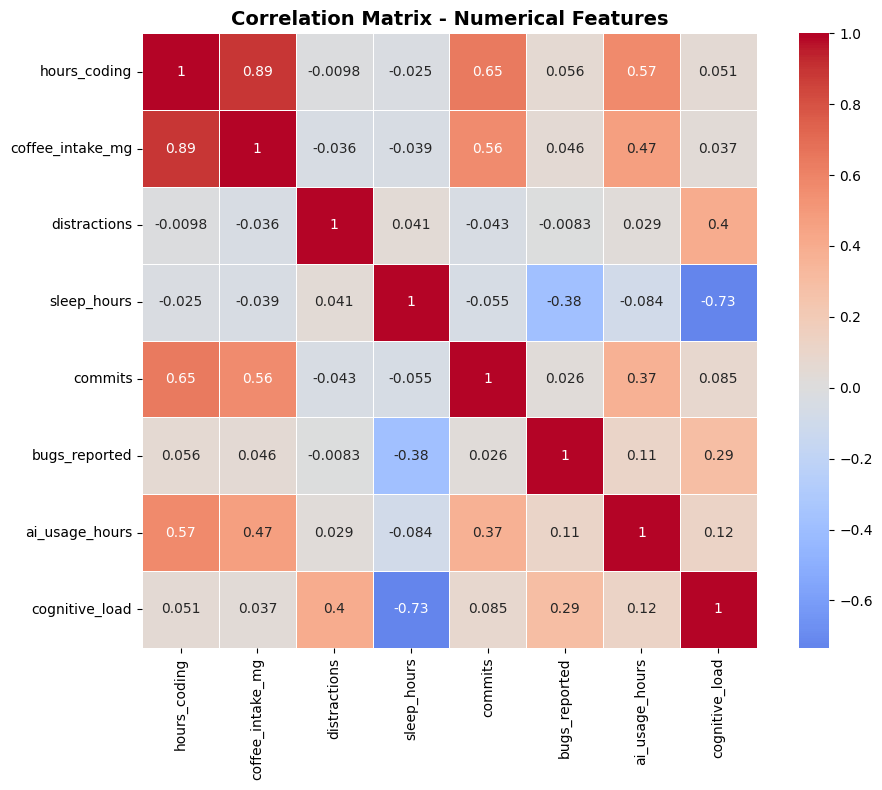

In [221]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[df.columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Null Values

In [222]:
df.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
dtype: int64

## Data Transformation

In [223]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_values, columns=df.columns, index=df.index)

print("Standardized")

Standardized


In [224]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,-3.019807e-17,1.001002,-2.578311,-0.727701,0.007402,0.647405,3.590388
coffee_intake_mg,500.0,-3.907985e-17,1.001002,-3.215301,-0.658909,0.262377,0.962132,0.962132
distractions,500.0,-3.552714e-18,1.001002,-1.774883,-0.582085,0.014314,0.610712,2.996308
sleep_hours,500.0,-2.877698e-16,1.001002,-2.733432,-0.602128,-0.017738,0.635404,2.079191
commits,500.0,1.438849e-16,1.001002,-1.705225,-0.595052,0.145063,0.515120,3.105522
bugs_reported,500.0,-1.953993e-17,1.001002,-0.778767,-0.778767,-0.778767,1.036540,3.759500
ai_usage_hours,500.0,-3.552714e-17,1.001002,-1.393232,-0.750061,-0.231375,0.515532,4.471377
cognitive_load,500.0,1.456613e-16,1.001002,-1.873710,-0.708734,-0.052598,0.697272,2.946880


## PCA

In [225]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(df_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) 

# Mengambil fitur untuk 80% variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
pca_optimal = PCA(n_components=n_components_80)
df_pca = pca_optimal.fit_transform(df_scaled)

print("PCA done")

PCA done



PRINCIPAL COMPONENT ANALYSIS (PCA)
Explained Variance Ratio per Component:
PC1: 0.3541 (35.41%)
PC2: 0.2484 (24.84%)
PC3: 0.1395 (13.95%)
PC4: 0.0926 (9.26%)
PC5: 0.0771 (7.71%)
PC6: 0.0587 (5.87%)
PC7: 0.0178 (1.78%)
PC8: 0.0117 (1.17%)

Cumulative Explained Variance:
PC1-PC1: 0.3541 (35.41%)
PC1-PC2: 0.6025 (60.25%)
PC1-PC3: 0.7420 (74.20%)
PC1-PC4: 0.8347 (83.47%)
PC1-PC5: 0.9118 (91.18%)
PC1-PC6: 0.9705 (97.05%)
PC1-PC7: 0.9883 (98.83%)
PC1-PC8: 1.0000 (100.00%)


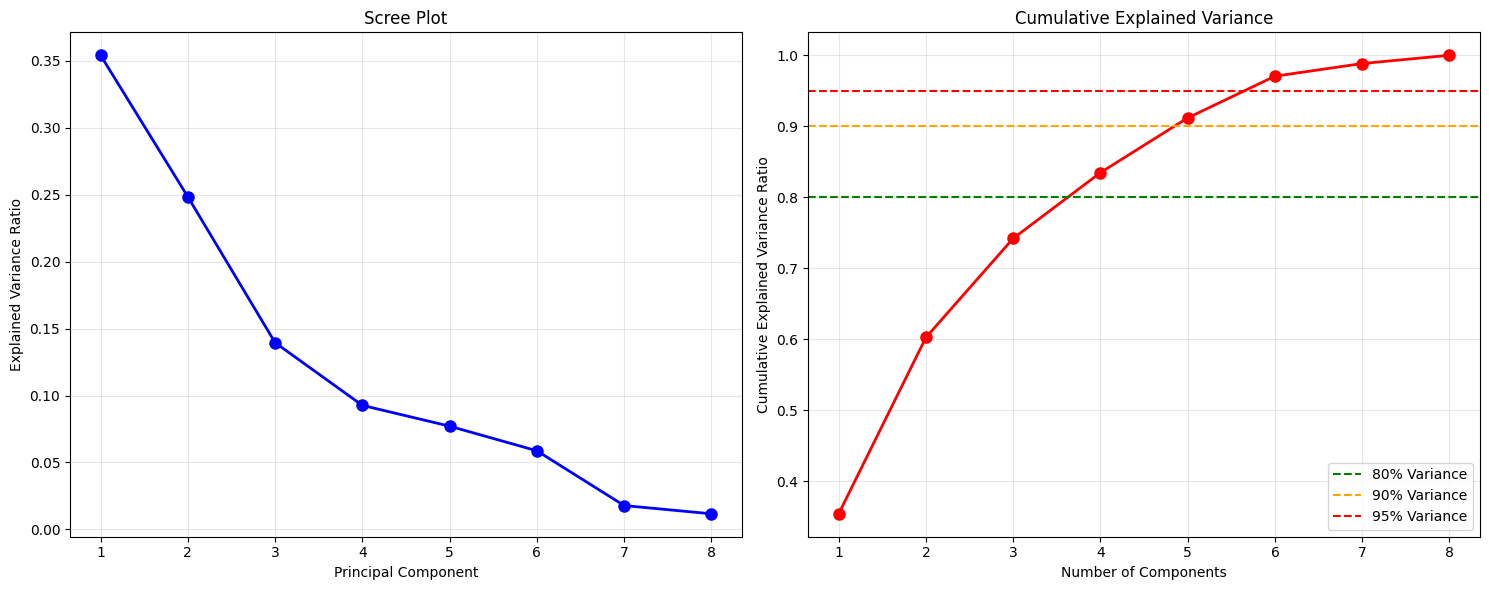

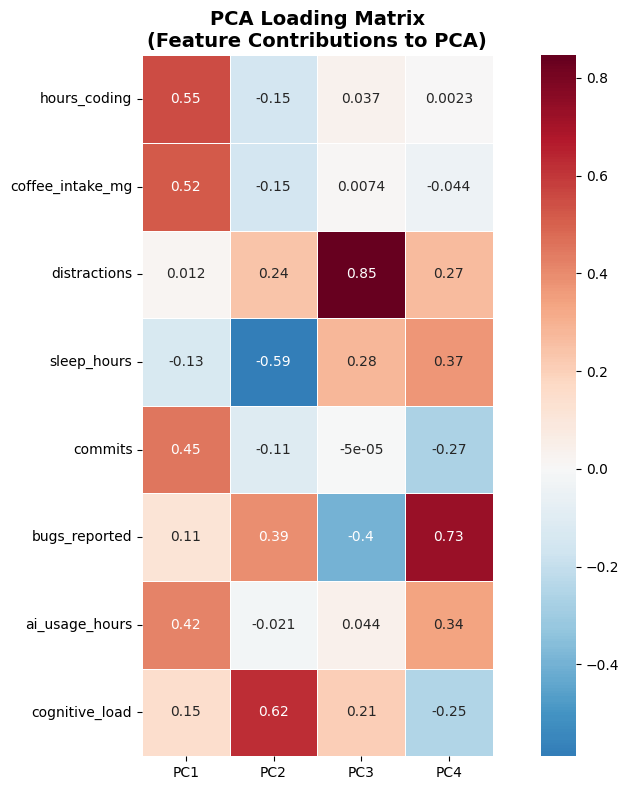

In [226]:
print("\nPRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 50)

print("Explained Variance Ratio per Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative Explained Variance:")
for i, cum_ratio in enumerate(cumulative_variance_ratio):
    print(f"PC1-PC{i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scree Plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))

# Cumulative Explained Variance Plot
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.tight_layout()
plt.show()

# Buat DataFrame
pca_columns = [f'PC{i+1}' for i in range(n_components_80)]
df_pca_result = pd.DataFrame(df_pca, columns=pca_columns, index=df.index)

loadings = pd.DataFrame(
    pca_optimal.components_.T,
    columns=pca_columns,
    index=df.columns
)
# loading matrix
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title('PCA Loading Matrix\n(Feature Contributions to PCA)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## DBSCAN